# API TESTS

Here we have some examples to communicate with arvapy API. Arounvision will use some of these requestes.

In [1]:
from ast import literal_eval
import requests
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Base variables and methods
url_base_path = "http://0.0.0.0:5000/" 

def get_rgb_from_yuv(raw, shape):
    """Convert YUV420 to RGB array!

    :param raw: bytearray received by API
    :type raw: bytearray
    """
    yuv = np.frombuffer(raw, dtype=np.uint8).reshape(shape)
    print(yuv.shape)
    return cv2.cvtColor(yuv, cv2.COLOR_YUV420P2BGR)  # YV12)

## 1. Get Stream List (get_stream_list)

In [3]:
# Get stream and print results
r = requests.get(url_base_path + "get_stream_list")

for i, s in enumerate(literal_eval(r.content.decode())):
    print({"name": s[0], "width": s[1], "height": s[2], "bytes_per_pixel": s[3], "number_of_layers": s[4]})

{'name': '/datasets/Turtle_3840x1920_30.yuv', 'width': 3840, 'height': 1920, 'bytes_per_pixel': 1, 'number_of_layers': 1}
{'name': '/datasets/SkateboardTrick_le_8192x4096.yuv', 'width': 8192, 'height': 4096, 'bytes_per_pixel': 1, 'number_of_layers': 1}


## 2. Select Stream (select_stream)

In [4]:
# select stream
r = requests.get(url_base_path + "select_stream?idx=0")  # post?
r.status_code

200

## 3. Get projections (get_projections)

In [5]:
## Get projections (get_projections) :: as projeções estão configuradas pq este precisava de devolver outro tipo de args
r = requests.get(url_base_path + "get_projections")
r.content

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">\n<title>404 Not Found</title>\n<h1>Not Found</h1>\n<p>The requested URL was not found on the server.  If you entered the URL manually please check your spelling and try again.</p>\n'

## 4. Get frame info (get_frame_info)

In [6]:
# get frame info
r = requests.get(url_base_path + "get_frame_info")
r.content

b'{"width": 3840, "height": 1920, "Bpp": 1, "byte_length": 11059200}'

## 5. Get frame raw (get_frame_raw?projection=....)

In [7]:
def display_frame_raw(proj):
    """Auxiliar method to: get_frame_info proj, get_frame_raw proj, display image."""
    # get frame info for ERP
    r_info = requests.get(url_base_path + "get_frame_info?projection="+proj)
    frame_info = literal_eval(r_info.content.decode())
    print("Frame info:", frame_info)

    width = frame_info["width"]
    height = frame_info["height"]
    shape = (int(height * 1.5), width)

    # Get frame raw
    r_content = requests.get(url_base_path + "get_frame_raw?projection="+proj, stream=True).content

    # convert yuv to rgb
    if len(r_content) > 0:
        rgb = get_rgb_from_yuv(r_content, shape)

        # display image
        plt.imshow(rgb)
        plt.show()
    else:
        print("Received an empty bytearray!")

### 5.1. Get frame raw: ERP - Equi-rectangular

Frame info: {'width': 3840, 'height': 1920, 'Bpp': 1, 'byte_length': 11059200}
(2880, 3840)


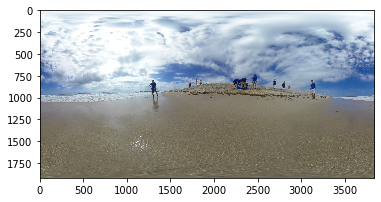

In [8]:
display_frame_raw("ERP")

### 5.2. Get frame raw: CM - Cube-Map

Frame info: {'width': 3324, 'height': 2216, 'Bpp': 1, 'byte_length': 11048976}
(3324, 3324)


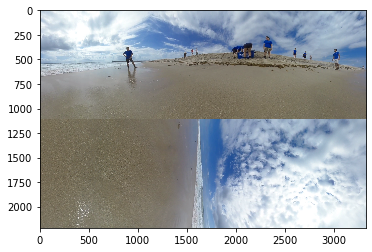

In [9]:
display_frame_raw("CMP")

### 5.3. Get frame raw: COHP - Compact OHP

Frame info: {'width': 3840, 'height': 1920, 'Bpp': 1, 'byte_length': 11059200}
(2880, 3840)


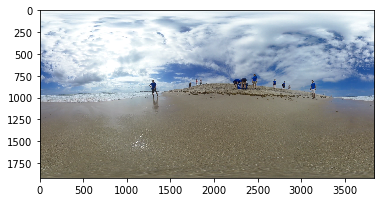

In [10]:
display_frame_raw("COHP")

### 5.4. Get frame raw: RECT - Rectilinear

In [11]:
display_frame_raw("RECT")

Frame info: {'width': 0, 'height': 0, 'Bpp': 1, 'byte_length': 0}
Received an empty bytearray!


### 5.5. Get frame raw: CISP - Compact ISP

Frame info: {'width': 2416, 'height': 3208, 'Bpp': 1, 'byte_length': 11625792}
(4812, 2416)


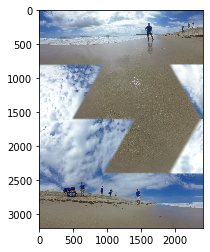

In [12]:
display_frame_raw("CISP")

## 6. Get Viewport

In [9]:
def get_shape(d):
    """Get shape from viewport response."""
    a = d.split(b"\n") 
    s = a[0].split(b"x") 
    w = int(s[0].decode()) 
    h = int(s[1].decode()) 
    size = (w, h) 
    return size, a[2] 
                              

## Get viewport info (get_viewport_info)

In [18]:
# select stream
r = requests.get(url_base_path + "select_stream?idx=0")  # post?
r.status_code

def _get_rgb_from_yuv(raw, shape):
    """Convert YUV420 to RGB array!

    :param raw: bytearray received by API
    :type raw: bytearray
    """
    yuv = np.frombuffer(raw, dtype=np.uint8).reshape(shape)
    bgr = cv2.cvtColor(yuv, cv2.COLOR_YUV420P2BGR)  # YV12)
    return bgr

def display_frame_raw_viewport(r_content,shape):
    # convert yuv to rgb
    if len(r_content) > 0:
        rgb = _get_rgb_from_yuv(r_content, shape)
        # display image
        plt.imshow(rgb)
        plt.show()
    else:
        print("Received an empty bytearray!")

        
def get_viewport(x, y, w, h):
    """ Auxiliar method to: get_frame_info proj, get_frame_raw proj, display image."""

    viewport_api_args = "coord=pixel"+"&x="+str(x)+"&y="+str(y)+"&width="+str(w)+"&height="+str(h)

    r_info = requests.get(url_base_path + "get_viewport_info?" + viewport_api_args)
    frame_info = literal_eval(r_info.content.decode())
    print("Frame info:", frame_info)

    width = frame_info["width"]
    height = frame_info["height"]
    shape = (int(height * 1.5), width)

    # Get viewport raw
    r_content = requests.get(url_base_path + "get_viewport_raw?" + viewport_api_args, stream=True).content
    display_frame_raw_viewport(r_content,shape)


Frame info: {'width': 992, 'height': 992, 'Bpp': 1, 'byte_length': 1476096}


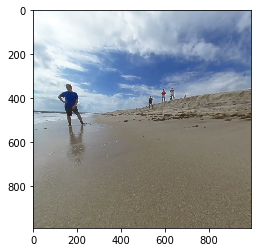

In [15]:
get_viewport( 1920 - 500/2, 960, 1000, 1000 )

Frame info: {'width': 488, 'height': 488, 'Bpp': 1, 'byte_length': 357216}


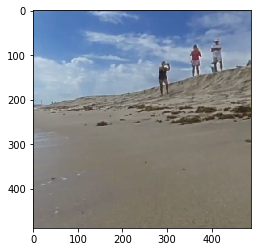

In [17]:
get_viewport( 1920-500/2, 960, 500, 500 )


Frame info: {'width': 456, 'height': 456, 'Bpp': 1, 'byte_length': 311904}


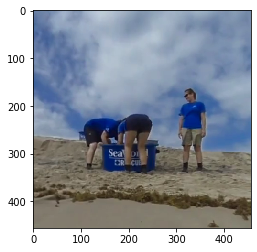

In [23]:
get_viewport( 2347, 1920-792, 469, 460)